In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df=pd.read_csv(r'C:\Users\Ramki\Downloads\cubic_zirconia.csv\cubic_zirconia.csv')
df.shape

(26967, 11)

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df=df.iloc[:, 1:]

In [5]:
#show the information about dataset
df_dtype=df.dtypes
df_missing=df.isna().mean().round(4)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
depth,2.58,float64,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
carat,0.00,float64,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,0.00,object,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.00,object,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,0.00,object,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,0.00,float64,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,0.00,float64,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,0.00,float64,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,0.00,float64,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,0.00,int64,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


### Missing value Treatment

In [6]:
df['depth'].fillna(df['depth'].mean(), inplace=True)

### Let's drop duplicates

In [7]:
print(f'before removing duplicates{df.shape}')
df.drop_duplicates(inplace=True)
print(f'after removing duplicates{df.shape}')

before removing duplicates(26967, 10)
after removing duplicates(26933, 10)


### Univariate Analysis

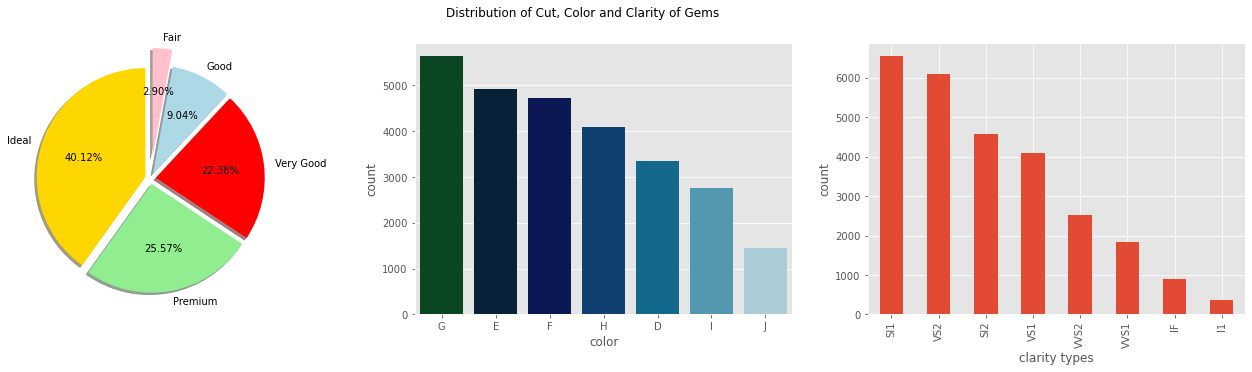

In [8]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(df['color'], palette='ocean', order=df['color'].value_counts().index)

plt.subplot(133)
df["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')


plt.suptitle('Distribution of Cut, Color and Clarity of Gems')
plt.show()

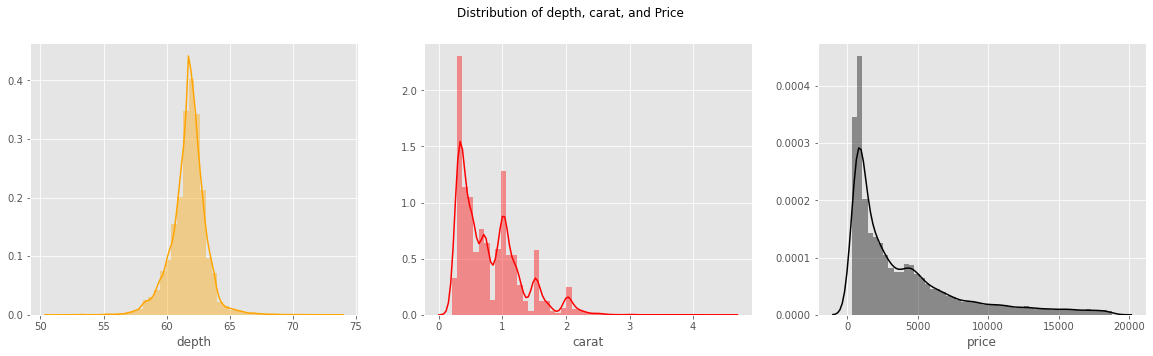

In [9]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['depth'], color='orange')

plt.subplot(132)
sns.distplot(df['carat'], color='red')

plt.subplot(133)
sns.distplot(df['price'], color='black')

plt.suptitle('Distribution of depth, carat, and Price')
plt.show()

In [10]:
import plotly.express as px

### Bivariate Analysis

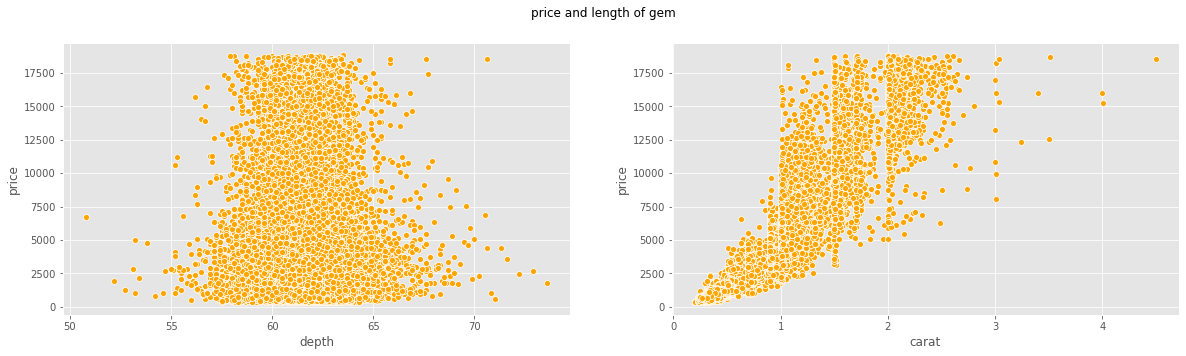

In [11]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(121)
sns.scatterplot(df['depth'], df['price'], color='orange')

plt.subplot(122)
sns.scatterplot(df['carat'], df['price'], color='orange')

plt.suptitle('price and length of gem')
plt.show()

### Let's check for correlation

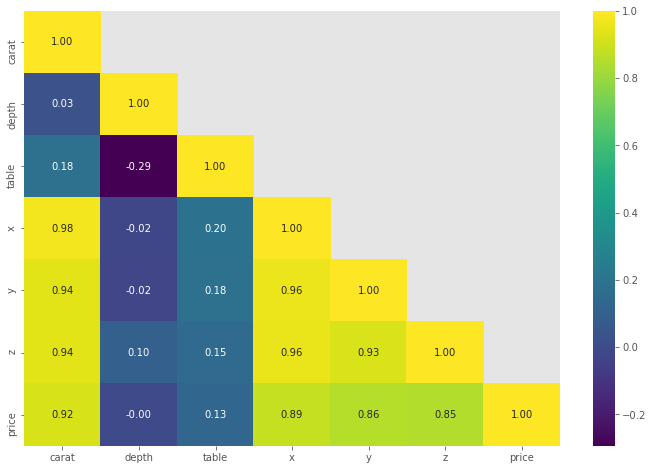

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='viridis',mask=np.triu(df.corr(),1))
plt.show()

In [13]:
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

x, y, z are highly correlated with carat. So we can remove x, y and z. 

### Remove outliers

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
cols = ['carat','depth', 'table','price']
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

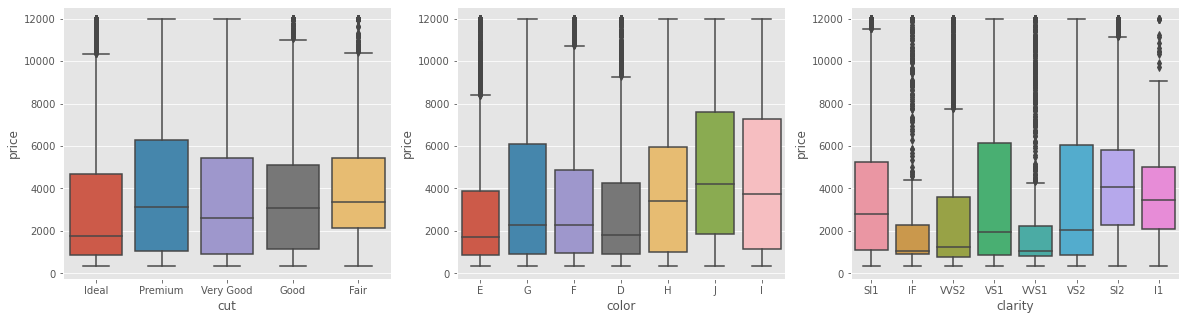

In [16]:
plt.subplot(131)
sns.boxplot(df['cut'], df['price'])

plt.subplot(132)
sns.boxplot(df['color'], df['price'])

plt.subplot(133)
sns.boxplot(df['clarity'], df['price'])

plt.show()

In [17]:
df[['price', 'cut']].groupby(['cut']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [18]:
df[['price', 'color']].groupby(['color']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [19]:
df[['price', 'clarity']].groupby(['clarity']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

### Data Preprocessing
* as per description let's encode 'cut' 

In [20]:
df['cut']=df['cut'].replace(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal'), (1,2,3,4,5))


In [21]:
colors_dummies=pd.get_dummies(df['color'], drop_first=True)
clarity_dummies=pd.get_dummies(df['clarity'], drop_first=True)
dummies=pd.concat([colors_dummies, clarity_dummies], axis=1)
df=pd.concat([df, dummies], axis=1)

In [22]:
df.drop(['color', 'clarity'], axis=1, inplace=True)

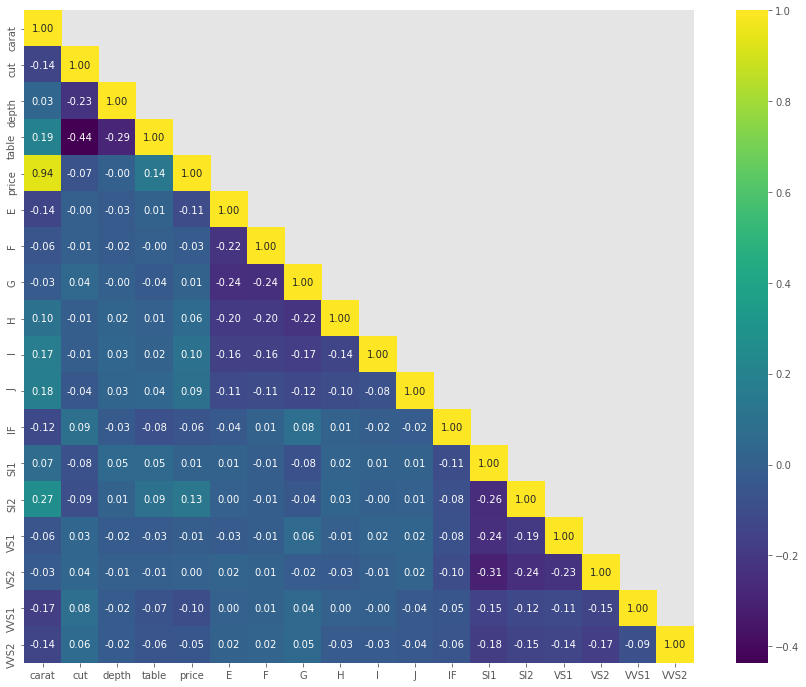

In [23]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='viridis',mask=np.triu(df.corr(),1))
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [25]:
x=df.drop('price', axis=1)
y=df['price']

In [26]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=10)

In [27]:
model=RandomForestRegressor()

In [28]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
model.score(X_test, y_test)

0.9807222939016099